In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as spt  
import numpy.fft as npt

0.10101010101010101 10.1010101010101 100


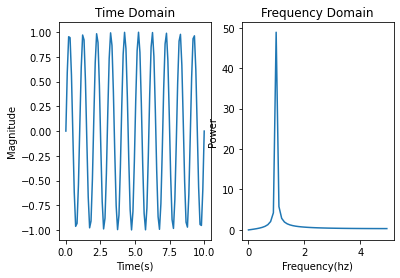

In [17]:
def F(t,Y, xlimt='none', xlimf='none', plot='yes', output='no', absolute='yes',norm='no'):
    f=spt.rfftfreq(np.size(t),d=t[1]-t[0]) #MATT: Moved the time spacing inside, and change to real fourier transform
    print(t[1]-t[0],1/(f[1]),len(t))
    if absolute=='no':                   #plotting non-absolute is better for composition
        if norm=='yes':                  #found code online normalised this way so added it as an optional parameter
            A=(spt.rfft(Y))/np.size(t)
        if norm=='no':
            A=(spt.rfft(Y))
    if absolute=='yes': #plotting absolute makes graphs more readible
        if norm=='yes':
            A=abs(spt.rfft(Y))/np.size(t)
        if norm=='no':
            A=abs(spt.rfft(Y))
    
    if plot=='yes':          #plotting after each fourier transform can be turned off for composition
        plt.subplot(1,2,1)
        plt.plot(t,Y)
        plt.xlabel('Time(s)')
        if xlimt!='none':
            plt.xlim([-xlimt,xlimt])
        plt.ylabel('Magnitude')
        plt.title('Time Domain')
    
        plt.subplot(1,2,2)
        plt.plot(f,A)
        if xlimf!='none':
            plt.xlim([-xlimf,xlimf])
        plt.xlabel('Frequency(hz)')
        plt.ylabel('Power')
        plt.title('Frequency Domain')
    
    if output=='yes':
        return f,A

t0=np.linspace(0,10,100)  #several functions that have been tested
y0=np.sin(2*np.pi*t0)
    
t1=np.linspace(0,10,100)
y1=np.cos(2*np.pi*t1)
      
t2=np.linspace(0,10,100)
y2=np.zeros(100)
for i in range(48,52):
    y2[i]=1
    
t3=np.linspace(0,10,100)
y3=np.zeros(100)
y3[50]=1

t4=np.linspace(0,10,100)
y4=np.cos(2*np.pi*t0)+np.sin(4*np.pi*t0)

t5=np.linspace(0,10,100)
y5=np.cos(2*np.pi*t0)+5

plot1=F(t0,y0) #change the inputs to transform each function (eg. try F(t2,y2))


[0.         0.05050505 0.1010101  0.15151515 0.2020202  0.25252525
 0.3030303  0.35353535 0.4040404  0.45454545 0.50505051 0.55555556
 0.60606061 0.65656566 0.70707071 0.75757576 0.80808081 0.85858586
 0.90909091 0.95959596 1.01010101 1.06060606 1.11111111 1.16161616
 1.21212121 1.26262626 1.31313131 1.36363636 1.41414141 1.46464646
 1.51515152 1.56565657 1.61616162 1.66666667 1.71717172 1.76767677
 1.81818182 1.86868687 1.91919192 1.96969697 2.02020202 2.07070707
 2.12121212 2.17171717 2.22222222 2.27272727 2.32323232 2.37373737
 2.42424242 2.47474747 2.52525253 2.57575758 2.62626263 2.67676768
 2.72727273 2.77777778 2.82828283 2.87878788 2.92929293 2.97979798
 3.03030303 3.08080808 3.13131313 3.18181818 3.23232323 3.28282828
 3.33333333 3.38383838 3.43434343 3.48484848 3.53535354 3.58585859
 3.63636364 3.68686869 3.73737374 3.78787879 3.83838384 3.88888889
 3.93939394 3.98989899 4.04040404 4.09090909 4.14141414 4.19191919
 4.24242424 4.29292929 4.34343434 4.39393939 4.44444444 4.4949

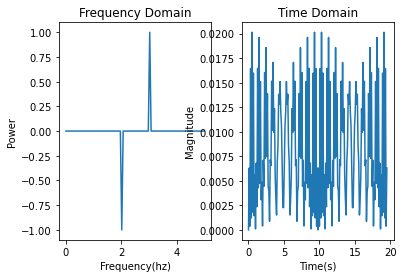

In [30]:
def invF(f,A,xlimf='none',xlimt='none', plot='yes', output='no', absolute='yes',norm='no'): #same as last cell but for inverse transform
    if absolute=='no':
        if norm=='yes':
            Y=(spt.irfft(A))/np.size(f)
        if norm=='no':
            Y=(spt.irfft(A))
    if absolute=='yes':
        if norm=='yes':    
            Y=abs(spt.irfft(A))/np.size(f)
        if norm=='no':
            Y=abs(spt.irfft(A))
    print(f)
    t=np.arange(0,len(Y)*(1/(2*(f[1]*len(f)))),1/(2*(f[1]*len(f))))
    
    if plot=='yes':
        plt.subplot(1,2,1)
        plt.plot(f,A)
        if xlimf!='none':
            plt.xlim([-xlimf,xlimf])
        plt.xlabel('Frequency(hz)')
        plt.ylabel('Power')
        plt.title('Frequency Domain')
    
        plt.subplot(1,2,2)
        plt.plot(t,Y)
        if xlimt!='none':
            plt.xlim([-xlimt,xlimt])
        plt.xlabel('Time(s)')
        plt.ylabel('Magnitude')
        plt.title('Time Domain')
    
    if output=='yes':
        return t,Y
    
f0=np.linspace(0,5,100)
A0=np.sinc(0.5*np.pi*f0)

f1=np.linspace(0,5,100)
A1=np.zeros(100)
A1[40]=-1
A1[60]=1

f2=np.linspace(0,5,100)
A2=np.zeros(100)
A2[40]=1
A2[60]=1

f3=np.linspace(0,5,100)
A3=np.ones(100)


invF(f1,A1,xlimf='none',xlimt='none') #frequency is actually 1 but appears to be 0.5 since absolute value is plotted

0.1 10.100000000000001 101
[0.         0.0990099  0.1980198  0.2970297  0.3960396  0.4950495
 0.59405941 0.69306931 0.79207921 0.89108911 0.99009901 1.08910891
 1.18811881 1.28712871 1.38613861 1.48514851 1.58415842 1.68316832
 1.78217822 1.88118812 1.98019802 2.07920792 2.17821782 2.27722772
 2.37623762 2.47524752 2.57425743 2.67326733 2.77227723 2.87128713
 2.97029703 3.06930693 3.16831683 3.26732673 3.36633663 3.46534653
 3.56435644 3.66336634 3.76237624 3.86138614 3.96039604 4.05940594
 4.15841584 4.25742574 4.35643564 4.45544554 4.55445545 4.65346535
 4.75247525 4.85148515 4.95049505]
[0.         0.0990099  0.1980198  0.2970297  0.3960396  0.4950495
 0.59405941 0.69306931 0.79207921 0.89108911 0.99009901 1.08910891
 1.18811881 1.28712871 1.38613861 1.48514851 1.58415842 1.68316832
 1.78217822 1.88118812 1.98019802 2.07920792 2.17821782 2.27722772
 2.37623762 2.47524752 2.57425743 2.67326733 2.77227723 2.87128713
 2.97029703 3.06930693 3.16831683 3.26732673 3.36633663 3.46534653
 3

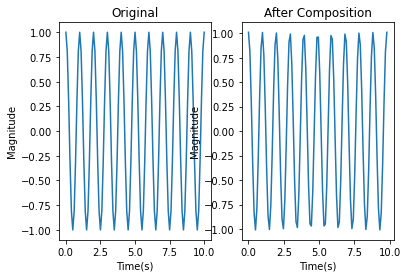

In [31]:
t0=np.linspace(0,10,101)
y0=np.zeros(101)
y0[50]=1

t1=np.linspace(0,10,101)
y1=np.cos(2*np.pi*t1)

t2=np.linspace(0,10,1001)
y2=np.zeros(1001)
for i in range(480,520):
    y2[i]=1

t3=np.linspace(-5,5,101)
y3=np.zeros(101)
y3[40]=1
y3[60]=1    

def compose(t,y):    #composition inverse transform of transform. works for sine and cosine only with shifted domains
    plt.subplot(1,2,1)
    plt.plot(t,y)
    plt.xlabel('Time(s)')
    plt.ylabel('Magnitude')
    plt.title('Original')
    x1,y1=F(t,y,plot='no',output='yes',absolute='no')
    print(x1)
    x2,y2=invF(x1,y1,plot='no',absolute='no', output='yes')
    plt.subplot(1,2,2)
    plt.plot(x2,y2)
    plt.xlabel('Time(s)')
    plt.ylabel('Magnitude')
    plt.title('After Composition')

compose(t1,y1)

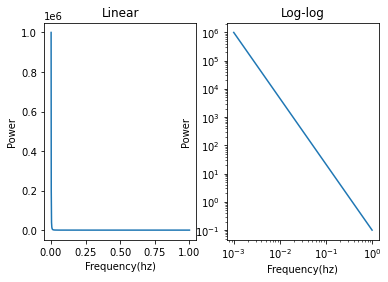

In [32]:
def P(f):  # model extracted from arXiv:1603.04461v1 figure 3
    return 0.1*f**(-7/3)
f=np.linspace(0.001,1,1000)
#f=np.linspace(0.001,1,999999)
#w=2*np.pi*f
P=P(f)
#q=input('0 for linear; 1 for log-log')
#if q==0:
plt.subplot(1,2,1)
#plt.plot(w,P)
plt.plot(f,P)
plt.title('Linear')
#plt.xlabel('Angular Frequency(rad/s)')
plt.xlabel('Frequency(hz)')
plt.ylabel('Power')
#if q==1:
plt.subplot(1,2,2)
#plt.loglog(w,P)
plt.loglog(f,P)
plt.title('Log-log')
#plt.xlabel('Angular Frequency(rad/s)')
plt.xlabel('Frequency(hz)')
plt.ylabel('Power')
plt.show()

[0.001 0.002 0.003 0.004 0.005 0.006 0.007 0.008 0.009 0.01  0.011 0.012
 0.013 0.014 0.015 0.016 0.017 0.018 0.019 0.02  0.021 0.022 0.023 0.024
 0.025 0.026 0.027 0.028 0.029 0.03  0.031 0.032 0.033 0.034 0.035 0.036
 0.037 0.038 0.039 0.04  0.041 0.042 0.043 0.044 0.045 0.046 0.047 0.048
 0.049 0.05  0.051 0.052 0.053 0.054 0.055 0.056 0.057 0.058 0.059 0.06
 0.061 0.062 0.063 0.064 0.065 0.066 0.067 0.068 0.069 0.07  0.071 0.072
 0.073 0.074 0.075 0.076 0.077 0.078 0.079 0.08  0.081 0.082 0.083 0.084
 0.085 0.086 0.087 0.088 0.089 0.09  0.091 0.092 0.093 0.094 0.095 0.096
 0.097 0.098 0.099 0.1   0.101 0.102 0.103 0.104 0.105 0.106 0.107 0.108
 0.109 0.11  0.111 0.112 0.113 0.114 0.115 0.116 0.117 0.118 0.119 0.12
 0.121 0.122 0.123 0.124 0.125 0.126 0.127 0.128 0.129 0.13  0.131 0.132
 0.133 0.134 0.135 0.136 0.137 0.138 0.139 0.14  0.141 0.142 0.143 0.144
 0.145 0.146 0.147 0.148 0.149 0.15  0.151 0.152 0.153 0.154 0.155 0.156
 0.157 0.158 0.159 0.16  0.161 0.162 0.163 0.164 0.16

Text(0.5, 1.0, 'Log-log')

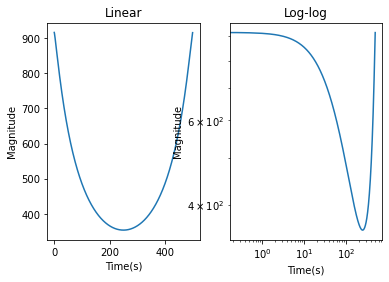

In [33]:
#invF(f,P)
x,y=invF(f,P,output='yes',plot='no')  #inverse fourier transform applied to model
plt.subplot(1,2,1)
plt.plot(x,y)
plt.xlabel('Time(s)')
plt.ylabel('Magnitude')
plt.title('Linear')



plt.subplot(1,2,2)
plt.loglog(x,y)
plt.xlabel('Time(s)')
plt.ylabel('Magnitude')
plt.title('Log-log')